# Создание дашборда по пользовательским событиям для агрегатора новостей 

**Ссылка на дашборд**

https://public.tableau.com/app/profile/ekaterina8580/viz/__16629877498630/Dashboard1

**Ссылка на презентацию**

https://disk.yandex.ru/d/3dkfBYOg6r5_lQ

## Загрузка данных и подготовка их к анализу

### Изучение данных из файла

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
!pip install psycopg2-binary

In [3]:
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

In [4]:
query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

In [5]:
dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [6]:
dash_visits.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


В нашем распоряжении таблица, которая содержит 30745 записей, 6 столбцов:
* record_id - уникальный id;
* item_topic - тема карточки;
* source_topic - тема источника;
* age_segment - возрастная категория;
* dt - дата и время посещения;
* visits - количество посещений.

### Исследование данных

In [7]:
# поиск дубликатов
dash_visits.duplicated().sum()

0

In [8]:
dash_visits['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

In [9]:
dash_visits['item_topic'].nunique()

25

Всего имеется 25 карточек.

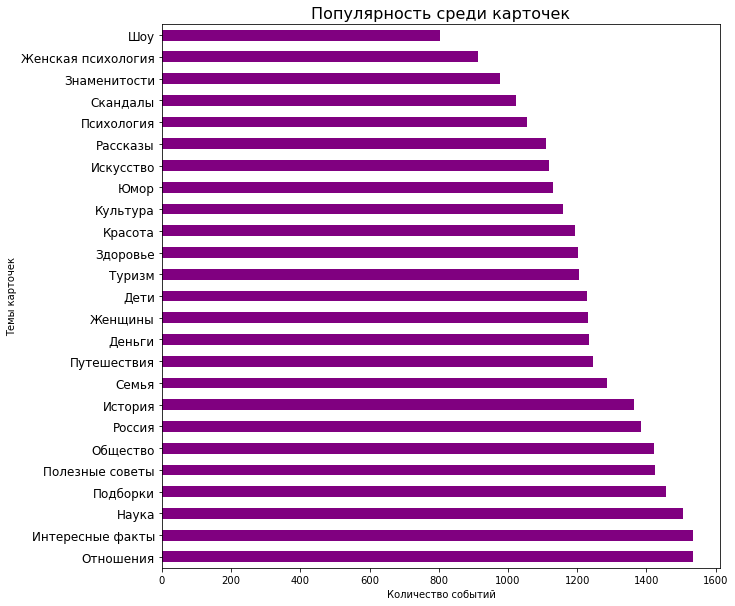

In [10]:
# визуализация
dash_visits['item_topic'].value_counts().sort_values(ascending=False).plot.barh(color="purple",figsize=(10, 10))
plt.title('Популярность среди карточек',fontsize=16);
plt.xlabel('Количество событий');
plt.ylabel('Темы карточек');
plt.yticks(rotation=0,fontsize=12);

На графике мы видим, что самая полпулярная тема - отношения.

In [11]:
dash_visits['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

Всего имеется 26 источников.

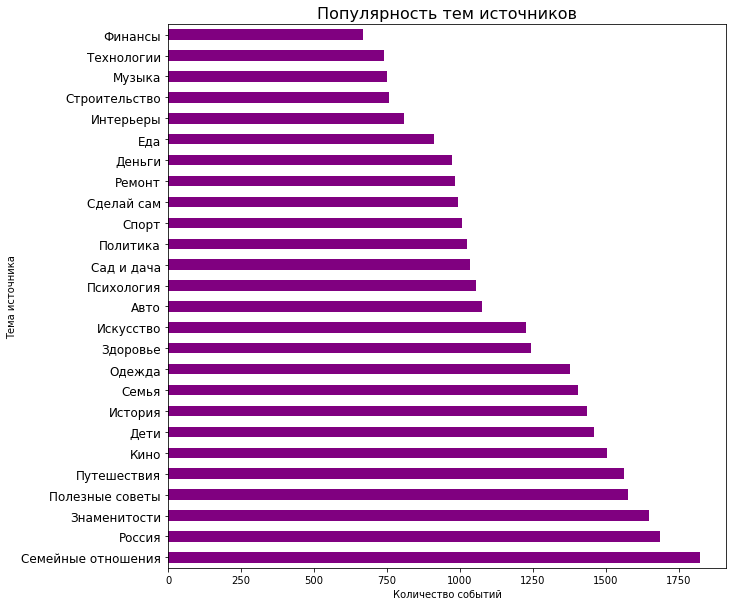

In [12]:
# визуализация
dash_visits['source_topic'].value_counts().sort_values(ascending=False).plot.barh(color="purple",figsize=(10, 10));
plt.title('Популярность тем источников',fontsize=16);
plt.xlabel('Количество событий');
plt.ylabel('Тема источника');
plt.yticks(rotation=0,fontsize=12);

На графике мы видим, что наиболее популярная тема источников - семейные отношения.

In [13]:
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

In [14]:
dash_visits['age_segment'].nunique()

6

In [15]:
# доля каждой категории
(dash_visits.groupby(dash_visits['age_segment']).size() / 
 len(dash_visits['age_segment'])).to_frame().style.background_gradient('coolwarm')

,0
age_segment,
18-25,0.229501
26-30,0.191088
31-35,0.180582
36-40,0.166043
41-45,0.126947
45+,0.105838


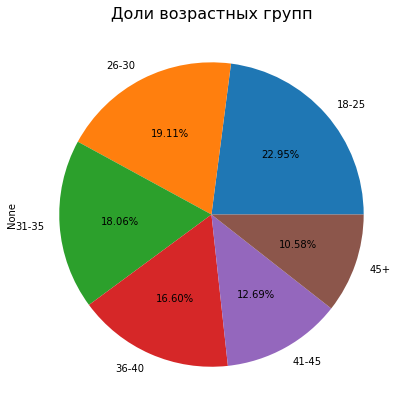

In [16]:
# визуализация
(dash_visits.groupby(dash_visits['age_segment']).size() / 
 len(dash_visits['age_segment'])).plot.pie(autopct = "%0.2f%%",figsize=(7, 7));
plt.title('Доли возрастных групп',fontsize=16);

На графике мы видим, что в нашем распоряжении 6 возрастных групп. Наиболее распространенная группа 18-25 лет, которая занимает 22.95% от тотала.

In [17]:
dash_visits['dt'].value_counts()

2019-09-24 18:58:00    3383
2019-09-24 18:57:00    3342
2019-09-24 18:56:00    3325
2019-09-24 18:59:00    3317
2019-09-24 18:55:00    3088
2019-09-24 19:00:00    2729
2019-09-24 18:54:00    2551
2019-09-24 18:30:00    1261
2019-09-24 18:32:00    1257
2019-09-24 18:31:00    1253
2019-09-24 18:53:00    1107
2019-09-24 18:29:00    1031
2019-09-24 18:33:00    1007
2019-09-24 18:52:00     719
2019-09-24 18:28:00     615
2019-09-24 18:34:00     576
2019-09-24 18:35:00     184
Name: dt, dtype: int64

In [18]:
dash_visits['dt'].nunique()

17

In [19]:
dash_visits['dt'].min()

Timestamp('2019-09-24 18:28:00')

In [20]:
dash_visits['dt'].max()

Timestamp('2019-09-24 19:00:00')

In [21]:
dash_visits['time'] = pd.to_datetime(dash_visits['dt'], format='%H:%M').dt.time
dash_visits['time']

0        18:32:00
1        18:35:00
2        18:54:00
3        18:55:00
4        18:56:00
           ...   
30740    18:57:00
30741    19:00:00
30742    18:54:00
30743    18:56:00
30744    19:00:00
Name: time, Length: 30745, dtype: object

В нашем распоряжении данные за 24 сентября 2019 года с 18:28 до 19:00.

In [22]:
dash_visits['visits'].describe()

count    30745.000000
mean        10.089673
std         19.727601
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        371.000000
Name: visits, dtype: float64

Максимальное количсетво посещений - 371, среднее количество посещений - 10.

In [23]:
dash_visits['record_id'].nunique()

30745

Все id в датафрейме уникальны.

## Вывод

В нашем распоряжении данные за 24 сентября 2019 года с 18:28 по 19:00 в виде датафрейма dash_visits, которая содержит 30745 записей, 6 столбцов:  
* record_id - уникальный id;
* item_topic - тема карточки;
* source_topic - тема источника;
* age_segment - возрастная категория;
* dt - дата и время посещения;
* visits - количество посещений.  

Пропуски и дубликаты в данных отсутствуют, все id - уникальны.  
В датафрейме присутсвует 6 возрастных групп. Наиболее распространенная группа 18-25 лет, которая занимает 22.95% от тотала.  
Наиболее популярная тема карточки - отношения. Всего 25 тем.  
Наиболее популярная тема источника - семейные отношения. Всего 26 источников.

In [24]:
# экспорт данных в csv-файл
dash_visits.to_csv('dash_visits.csv', index=False)

In [25]:
# проверка
test = pd.read_csv('dash_visits.csv')

In [26]:
test

,record_id,item_topic,source_topic,age_segment,dt,visits,time
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3,18:32:00
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1,18:35:00
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4,18:54:00
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17,18:55:00
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27,18:56:00
...,...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2,18:57:00
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1,19:00:00
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1,18:54:00
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1,18:56:00
